# My first Scikit-learn

150개의 꽃 샘플에서 꽃잎 길이와 꽃잎 너비를 특성행렬 X에 할당하고 이에 상응하는 꽃 품종에 대한 클래스 레이블을 y에 할당

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("type of dataset: ", type(iris))
print("type of data: ", type(X))
print("type of target: ", type(y))
print("class label: ", np.unique(y)) 
# 0: setosa
# 1: versicolor
# 2: virginica

type of dataset:  <class 'sklearn.utils.Bunch'>
type of data:  <class 'numpy.ndarray'>
type of target:  <class 'numpy.ndarray'>
class label:  [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# test_size: test set의 비율
# random_state: 분할 전 섞음
# stratify: tarin set과 test set의 label 비율을 맞춤

print('label count of y:', np.bincount(y))
print('label count of y_train:', np.bincount(y_train))
print('label count of y_test:', np.bincount(y_test))

label count of y: [50 50 50]
label count of y_train: [35 35 35]
label count of y_test: [15 15 15]


## feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# fit: 각 특성 차원마다 평균과 표준 편차 계산
# transform: 계산된 평균 및 편차를 이용하여 이동 

## training

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## testing

In [6]:
y_pred = ppn.predict(X_test_std)
print('worng answer: {}'.format((y_pred != y_test).sum()))

worng answer: 1


In [7]:
from sklearn.metrics import accuracy_score
print('accuracy: {}'.format(accuracy_score(y_test, y_pred)))

accuracy: 0.9777777777777777


In [8]:
print('accuracy: {}'.format(ppn.score(X_test_std, y_test)))

accuracy: 0.9777777777777777


## decision region

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.01):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], 
                    label=cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    alpha=1.0, c='none', marker='o', edgecolor='black',
                    linewidth=1, s=100, label='test set')

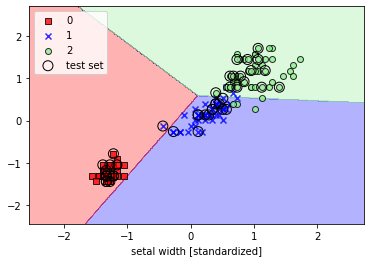

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,  classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('setal width [standardized]')
plt.legend(loc='upper left')
plt.show()